In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

In [ ]:
df1 = pd.read_csv('dataset_15k_pages_1_stage.csv')

In [ ]:
df1 = df1[df1['stages_number']==1] #оставляем только реакции с одной стадией
df1['temperature_1'] = df1.apply(lambda x: [], axis=1)
df1['pressure_1'] = df1.apply(lambda x: [], axis=1)
df1['time_1'] = df1.apply(lambda x: [], axis=1)
df1['pH_1'] = df1.apply(lambda x: [], axis=1)
df1 = df1.reindex(columns=['reaction_id', 'reactants', 'products', 'stages_number', 'yield_value', 'reference_title', 'authors', 'bibliography', 'reagents_1', 'catalysts_1', 'solvents_1', 'other_conditions_1', 'temperature_1', 'pressure_1', 'time_1', 'pH_1', 'folder', 'file'])
df1 = df1.reset_index(drop=True)
df1.shape

(279761, 18)

In [ ]:
df = df1.copy()

In [ ]:
#разделение other_conditions_1 на время, температуру и давление

left = []
for idx in df.index:
  conditions = df.loc[idx, 'other_conditions_1']
  if type(conditions)!=float:
    conditions = conditions.replace(';', ',')
    splitted_conditions = conditions.split(', ')
    for i in splitted_conditions:
      if ' °C' in i or ' K' in i or 'rt' in i or 'heated' in i or 'cooled' in i or 'reflux' in i:
        df.loc[idx, 'temperature_1'].append(i)
      elif 'Pa' in i or ' atm' in i or ' psi' in i or 'bar' in i or ' torr' in i or ' kg/cm2' in i or 'mm' in i:
        df.loc[idx, 'pressure_1'].append(i)
      elif ' d' in i or ' h' in i or ' min' in i or ' s' in i or 'overnight' in i or ' ms' in i or ' w' in i or ' mo' in i:
        df.loc[idx, 'time_1'].append(i)
      elif 'pH' in i or 'acidified' in i or 'neutralized' in i or 'basified' in i:
        df.loc[idx, 'pH_1'].append(i)
      else:
        left.append(i)

df

,reaction_id,reactants,products,stages_number,yield_value,reference_title,authors,bibliography,reagents_1,catalysts_1,solvents_1,other_conditions_1,temperature_1,pressure_1,time_1,pH_1,folder,file
0,31-480-CAS-24139,['119-53-9'],['134-81-6'],1,90%,Decomposition products of benzaldehyde,"Zinin, N.","Justus Liebigs Annalen der Chemie (1840), 186-192",['Nitric acid'],[],[],NaN,[],[],[],[],NaN,NaN
1,31-480-CAS-18071,['119-53-9'],['134-81-6'],1,86%,Benzil,"Clarke, H. T.","Organic Syntheses (1926), VI, 6-7","['Pyridine', 'Copper sulfate pentahydrate']",[],['Water'],NaN,[],[],[],[],NaN,NaN
2,31-480-CAS-27637,['119-53-9'],['134-81-6'],1,95%,New reagent for the oxidation of acyloins to d...,"Rigby, W.","Journal of the Chemical Society (1951), 793-5",['Bismuth oxide (Bi2O3)'],[],"['Acetic acid', 'Glycol monoethyl ether']",NaN,[],[],[],[],NaN,NaN
3,31-480-CAS-25495,['119-53-9'],['134-81-6'],1,90%,Reactions of thallium. II. Thallous ethoxide a...,"McHatton, L. P.","Journal of the Chemical Society (1953), 4095-7","['Ethanol, thallium salt']",[],['Ethanol'],NaN,[],[],[],[],NaN,NaN
4,31-480-CAS-37840,['119-53-9'],['134-81-6'],1,32%,New reactions in organoselenium chemistry,"Brewster, Andrew George","1977, (20121004), No pp.",['Phenylseleninyl benzeneseleninate'],[],['Tetrahydrofuran'],NaN,[],[],[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279756,31-614-CAS-26952067,"['9011-14-7', '100-42-5']",['106911-77-7'],1,100%,"Block copolymer intermediate, block copolymer,...","Kou, Youki","World Intellectual Property Organization, WO20...",[],['sec-Butyllithium'],"['Toluene', 'Cyclohexane']","3 h, 10 °C",[10 °C],[],[3 h],[],11301-11400,11328.tsv
279757,31-614-CAS-26051353,"['9011-14-7', '100-42-5']",['696598-57-9'],1,85%,Tailored Synthesis of Structurally Defined Pol...,"Yamago, Shigeru",Journal of the American Chemical Society (2002...,[],[],['Chloroform'],"24 h, 100 °C",[100 °C],[],[24 h],[],11301-11400,11328.tsv
279758,31-614-CAS-26567521,"['9011-14-7', '100-42-5']",['696598-57-9'],1,85%,Silsesquioxane-cored miktoarm copolymer amphip...,"Gao, Shuxi","European Polymer Journal (2021), 143, 110196",[],['Azobisisobutyronitrile'],['Toluene'],"2 h, 70 °C",[70 °C],[],[2 h],[],11301-11400,11328.tsv
279759,31-614-CAS-30155371,"['9011-14-7', '100-42-5']",['821787-83-1'],1,100%,Precise Synthesis of New Triblock Co- and Terp...,"Matsuo, Yuri","Macromolecular Symposia (2013), 323(1), 26-36",[],[],[],"20 h, -40 °C",[-40 °C],[],[20 h],[],11301-11400,11328.tsv


In [ ]:
#проверка все ли условия учтены
for i in set(left):
  print(i)

In [ ]:
def time_to_hours(i):
  if 'd' in i:
    i = i.replace(' d', '')
    i = float(i)*24
  elif ' h' in i:
    i = i.replace(' h', '')
    i = float(i)
  elif 'min' in i:
    i = i.replace(' min', '')
    i = float(i)/60
  elif ' s' in i:
    i = i.replace(' s', '')
    i = float(i)/60/60
  elif ' ms' in i:
    i = i.replace(' ms', '')
    i = float(i)/60/60/1000
  elif 'overnight' in i:
    i = i.replace('overnight', '')
    i = 12
  elif ' mo' in i or ' w' in i:
    i = [0]
  return i

In [ ]:
#стандартизация времени

time_column = df['time_1'].tolist()
new_time_column = []
for time in time_column:
  new_time = []
  for t in time:
    if ' - ' not in t:
        if '<' in t:
          t = t.replace('< ', '')
        elif '>' in t:
          t = t.replace('> ', '')
        t = time_to_hours(t) 
    else:
        splitted_t = t.split(' - ')
        x = splitted_t[1]
        x = x.split(' ')
        av = (float(t[0])+float(x[0]))/2
        t = str(av) + ' ' + str(x[1])
        t = time_to_hours(t)
    new_time.append(t)
  new_time_column.append(new_time)

df['time_1']=new_time_column
print(df['time_1'])

0             []
1             []
2             []
3             []
4             []
           ...  
279756     [3.0]
279757    [24.0]
279758     [2.0]
279759    [20.0]
279760        []
Name: time_1, Length: 279761, dtype: object


In [ ]:
#удаление строк, где время указано в формате недель и месяцев

for idx in df.index:
  if [0] in df.loc[idx, 'time_1']:
    df.drop(labels=[idx], inplace=True)
df = df.reset_index(drop=True)
df.shape

(279670, 18)

In [ ]:
def temp_to_celsius(i):
  if '°C' in i:
    i = i.replace(' °C', '')
    i = float(i)
  elif ' K' in i:
    i = i.replace(' K', '')
    i = float(i)-273
  return i

In [ ]:
#стандартизация температуры

temp_column = df['temperature_1'].tolist()
new_temp_column = []
for temp in temp_column:
  new_temp = []
  for t in temp:
    if '>' in t:
        t = t.replace('> ', '')
    elif '<' in t:
        t = t.replace('< ', '')
    if 'rt' in t:
      if '→' in t:
        t = t.replace('rt', '')
        t = t.replace(' → ', '')
        t = temp_to_celsius(t)
      elif 'reflux' in t:
        t = 'reflux'
      elif ' - ' in t:
        t = t.replace('rt', '')
        t = t.replace(' - ', '')
        t = temp_to_celsius(t)
      else:
        t = 25.0
    elif ' - ' in t:
      splitted_t = t.split(' - ')
      x = splitted_t[1]
      x = x.split(' ')
      av = (float(splitted_t[0])+float(x[0]))/2
      t = str(av) + ' ' + str(x[1])
      t = temp_to_celsius(t)
    elif 'reflux' in t:
      t = 'reflux'
    elif '→' in t:
      splitted_t = t.split(' → ')
      x = splitted_t[1]
      y = splitted_t[0]
      x = x.split(' ')
      y = y.split(' ')
      av = (float(y[0])+float(x[0]))/2
      t = str(av) + ' ' + str(x[1])
      t = temp_to_celsius(t)
    elif '±' in t:
      splitted_t = t.split(' ± ')
      t = splitted_t[0]    
    else:
      t = temp_to_celsius(t)
    new_temp.append(t)
  new_temp_column.append(new_temp)

In [ ]:
df['temperature_1'] = new_temp_column

In [ ]:
def pressure_to_mpa(i):
      if 'atm' in i:
        i = i.replace(' atm', '')
        i = float(i)*0.10133
      elif 'psig' in i:
        i = i.replace(' psig', '')
        i = float(i)*0.00689
      elif 'psi' in i:
        i = i.replace(' psi', '')
        i = float(i)*0.00689
      elif ' bar' in i:
        i = i.replace(' bar', '')
        i = float(i)*0.1
      elif ' kbar' in i:
        i = i.replace(' kbar', '')
        i = float(i)*100
      elif ' kPa' in i:
        i = i.replace(' kPa', '')
        i = float(i)*0.001
      elif ' Pa' in i:
        i = i.replace(' Pa', '')
        i = float(i)*0.000001
      elif ' MPa' in i:
        i = i.replace(' MPa', '')
        i = float(i)
      elif ' GPa' in i:
        i = i.replace(' GPa', '')
        i = float(i)*1000
      elif ' mbar' in i:
        i = i.replace(' mbar', '')
        i = float(i)*0.0001
      elif ' torr' in i:
        i = i.replace(' torr', '')
        i = float(i)*0.000133
      elif ' hPa' in i:
        i = i.replace(' hPa', '')
        i = float(i)*0.0001
      elif ' kg/cm2' in i:
        i = i.replace(' kg/cm2', '')
        i = float(i)*0.0981
      elif ' mm Hg' in i:
        i = i.replace(' mm Hg', '')
        i = float(i)*0.000133
      elif ' mm' in i:
        i = i.replace(' mm', '')
        i = float(i)*0.000133
      return i

In [ ]:
#стандартизация давления

pres_column = df['pressure_1'].tolist()
new_pres_column = []
for pres in pres_column:
  new_pres = []
  for p in pres:
    if '>' in p:
      p = p.replace('> ', '')
    elif '<' in p:
      p = p.replace('< ', '')
    if ' - ' in p:
      splitted_p = p.split(' - ')
      x = splitted_p[1]
      x = x.split(' ')
      av = (float(splitted_p[0])+float(x[0]))/2
      p = str(av) + ' ' + str(x[1])
      p = pressure_to_mpa(p)
    elif '→' in p:
      splitted_p = p.split(' → ')
      x = splitted_p[1]
      y = splitted_p[0]
      x = x.split(' ')
      y = y.split(' ')
      av = (float(y[0])+float(x[0]))/2
      p = str(av) + ' ' + str(x[1])
      p = pressure_to_mpa(p)
    else:
      p = pressure_to_mpa(p)
    new_pres.append(p)
  new_pres_column.append(new_pres)

In [ ]:
df['pressure_1'] = new_pres_column

In [ ]:
#стандартизация рН

ph_column = df['pH_1'].tolist()
new_ph_column = []
for i in ph_column:
  if 'pH' in i:
    i = i.replace(' pH', '')
    i = float(i)
  new_ph_column.append(i)
df['pH_1'] = new_ph_column

In [ ]:
#удаление лишних символов из колонок с названиями веществ

def good_column(name):
  new = []
  count = 0
  for idx in df.index:
    s = df.loc[idx, name]
    if type(s)!=float:
      if ', ' in s:
        count += 1
        splitted_s = s.split("', '")
        splitted_s_2 = []
        for i in splitted_s:
          i = i.replace("'", '')
          i = i.replace("[", '')
          i = i.replace("]", '')
          splitted_s_2.append(i)
        new.append(splitted_s_2)
      elif '[]' in s:
        s = None
        new.append(s)
      else:
        s = s.replace("'", '')
        s = s.replace('[', '')
        s = s.replace(']', '')
        new.append(s)
    else:
      new.append(None)
  return new

In [ ]:
new_solvents = good_column('solvents_1')
new_reagents = good_column('reagents_1')
new_catalysts = good_column('catalysts_1')
new_reactants = good_column('reactants')
new_products = good_column('products')

In [ ]:
df['solvents_1']=new_solvents
df['reagents_1']=new_reagents
df['catalysts_1']=new_catalysts
df['reactants']=new_reactants
df['products']=new_products

In [ ]:
df

,reaction_id,reactants,products,stages_number,yield_value,reference_title,authors,bibliography,reagents_1,catalysts_1,solvents_1,other_conditions_1,temperature_1,pressure_1,time_1,pH_1,folder,file
0,31-480-CAS-24139,119-53-9,134-81-6,1,90%,Decomposition products of benzaldehyde,"Zinin, N.","Justus Liebigs Annalen der Chemie (1840), 186-192",Nitric acid,None,None,NaN,[],[],[],[],NaN,NaN
1,31-480-CAS-18071,119-53-9,134-81-6,1,86%,Benzil,"Clarke, H. T.","Organic Syntheses (1926), VI, 6-7","[Pyridine, Copper sulfate pentahydrate]",None,Water,NaN,[],[],[],[],NaN,NaN
2,31-480-CAS-27637,119-53-9,134-81-6,1,95%,New reagent for the oxidation of acyloins to d...,"Rigby, W.","Journal of the Chemical Society (1951), 793-5",Bismuth oxide (Bi2O3),None,"[Acetic acid, Glycol monoethyl ether]",NaN,[],[],[],[],NaN,NaN
3,31-480-CAS-25495,119-53-9,134-81-6,1,90%,Reactions of thallium. II. Thallous ethoxide a...,"McHatton, L. P.","Journal of the Chemical Society (1953), 4095-7","[Ethanol, thallium salt]",None,Ethanol,NaN,[],[],[],[],NaN,NaN
4,31-480-CAS-37840,119-53-9,134-81-6,1,32%,New reactions in organoselenium chemistry,"Brewster, Andrew George","1977, (20121004), No pp.",Phenylseleninyl benzeneseleninate,None,Tetrahydrofuran,NaN,[],[],[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279665,31-614-CAS-26952067,"[9011-14-7, 100-42-5]",106911-77-7,1,100%,"Block copolymer intermediate, block copolymer,...","Kou, Youki","World Intellectual Property Organization, WO20...",None,sec-Butyllithium,"[Toluene, Cyclohexane]","3 h, 10 °C",[10.0],[],[3.0],[],11301-11400,11328.tsv
279666,31-614-CAS-26051353,"[9011-14-7, 100-42-5]",696598-57-9,1,85%,Tailored Synthesis of Structurally Defined Pol...,"Yamago, Shigeru",Journal of the American Chemical Society (2002...,None,None,Chloroform,"24 h, 100 °C",[100.0],[],[24.0],[],11301-11400,11328.tsv
279667,31-614-CAS-26567521,"[9011-14-7, 100-42-5]",696598-57-9,1,85%,Silsesquioxane-cored miktoarm copolymer amphip...,"Gao, Shuxi","European Polymer Journal (2021), 143, 110196",None,Azobisisobutyronitrile,Toluene,"2 h, 70 °C",[70.0],[],[2.0],[],11301-11400,11328.tsv
279668,31-614-CAS-30155371,"[9011-14-7, 100-42-5]",821787-83-1,1,100%,Precise Synthesis of New Triblock Co- and Terp...,"Matsuo, Yuri","Macromolecular Symposia (2013), 323(1), 26-36",None,None,None,"20 h, -40 °C",[-40.0],[],[20.0],[],11301-11400,11328.tsv


In [ ]:
#вывод уникальных значений по неразделенной колонке

def dataframe_unique(name):
  u = df[name].tolist()
  u_2 = []
  for i in u:
    if i!=None:
      if i==list(i):
        u_2.extend(i)
      else:
        u_2.append(i)
  u_3 = list(set(u_2))
  d = {'query': u_3}
  df_u = pd.DataFrame(d)
  df_u.to_csv(f'{name}.csv', index=False)

In [ ]:
dataframe_unique('solvents_1')
dataframe_unique('reagents_1')
dataframe_unique('catalysts_1')
dataframe_unique('reactants')
dataframe_unique('products')

In [ ]:
#удаление % из столбца с выходом

new_yield = []
for idx in df.index:
  new_yield.append(int(str(df.loc[idx, 'yield_value']).replace('%', '')))
df['yield_value'] = new_yield

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279670 entries, 0 to 279669
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   reaction_id         279670 non-null  object
 1   reactants           279670 non-null  object
 2   products            279670 non-null  object
 3   stages_number       279670 non-null  int64 
 4   yield_value         279670 non-null  int64 
 5   reference_title     279670 non-null  object
 6   authors             278803 non-null  object
 7   bibliography        278894 non-null  object
 8   reagents_1          191912 non-null  object
 9   catalysts_1         124134 non-null  object
 10  solvents_1          241798 non-null  object
 11  other_conditions_1  233655 non-null  object
 12  temperature_1       279670 non-null  object
 13  pressure_1          279670 non-null  object
 14  time_1              279670 non-null  object
 15  pH_1                279670 non-null  object
 16  fo

In [ ]:
def more_than_one(name):
  count_zero = 0
  count_one = 0
  count_two = 0
  count_three = 0
  count_four = 0
  count_five = 0
  count_six = 0
  counts = []
  for idx in df.index:
    if type(df.loc[idx, name])==list:
      if len(df.loc[idx, name]) == 1:
        count_one += 1
      elif len(df.loc[idx, name]) == 2:
        count_two += 1
      elif len(df.loc[idx, name]) == 3:
        count_three += 1
      elif len(df.loc[idx, name]) == 4:
        count_four += 1
      elif len(df.loc[idx, name]) == 5:
        count_five += 1
      elif len(df.loc[idx, name]) == 6:
        count_six += 1
      elif len(df.loc[idx, name]) == 0:
        count_zero += 1
    elif type(df.loc[idx, name])==str:
      count_one += 1
  counts.append(count_zero)
  counts.append(count_one)
  counts.append(count_two)
  counts.append(count_three)
  counts.append(count_four)
  counts.append(count_five)
  counts.append(count_six)
  return counts

In [ ]:
def number_of_compounds(name):
  data = ['0', '1', '2', '3', '4', '5',  '6']
  values = more_than_one(name)
  fig, ax = plt.subplots()
  ax.bar(data, values)
  color_rectangle = np.random.rand(23, 4)    # RGB
  ax.bar(data, values, color = color_rectangle)
  fig.set_figwidth(12)    #  ширина Figure
  fig.set_figheight(6)    #  высота Figure
  plt.ylabel("Кол-во строк")
  plt.xlabel('Кол-во веществ')
  plt.title(name)
  plt.show()

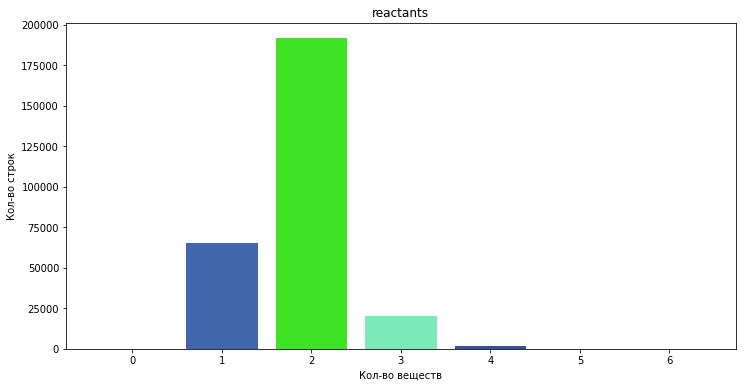

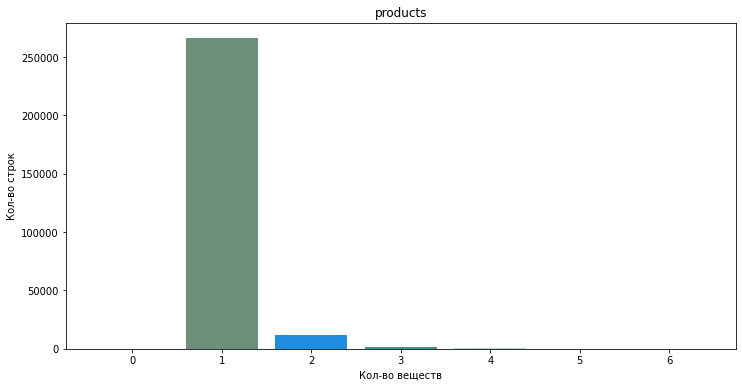

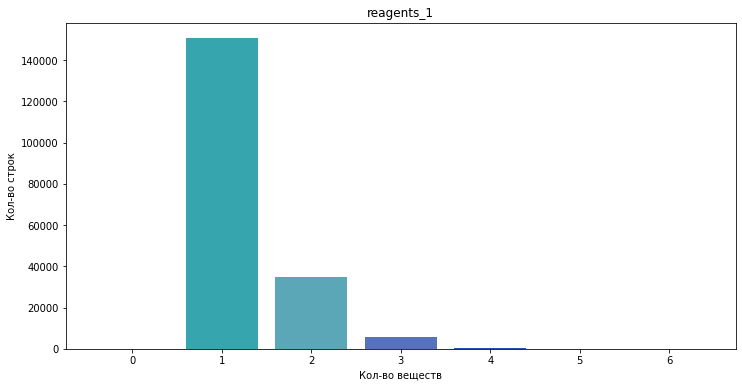

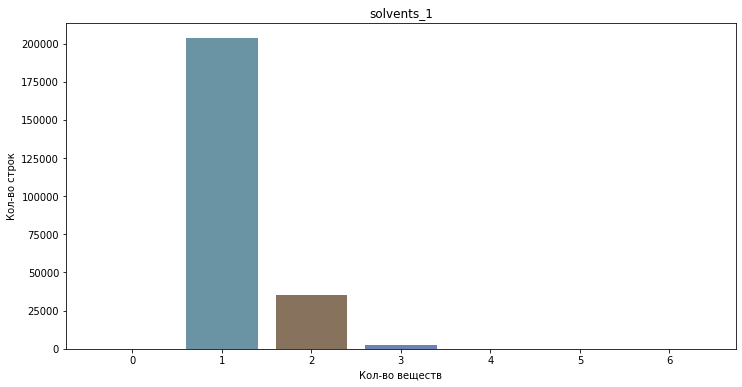

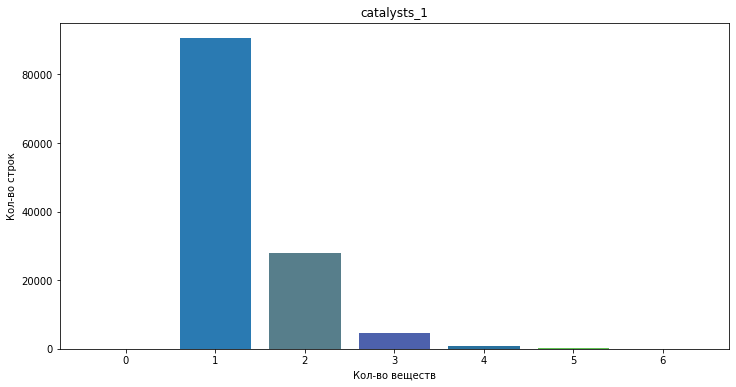

In [ ]:
#количество веществ по столбцам

cols = ['reactants', 'products', 'reagents_1', 'solvents_1', 'catalysts_1']
for col in cols:
  number_of_compounds(col)

In [ ]:
df.shape

(279670, 18)

In [ ]:
#подсчет слов в колонке

def count_in_column(col_name, word):
  count = 0
  for idx in df.index:
    if type(df.loc[idx, col_name])!=float:
      if word in df.loc[idx, col_name]:
        count += 1
  return word, count

In [ ]:
count_in_column('temperature_1', 'reflux')

('reflux', 29223)

In [ ]:
#разделение ячейки со списком веществ на разные столбцы

def divide(col_name):
  for idx in df.index:
    cell = df.loc[idx, col_name]
    if type(cell)==list:
      if len(cell)>1:
        cell = cell[:2]
        df.at[idx, f'{col_name}_II'] = cell[1]
        df.at[idx, col_name] = cell[0]
      elif len(cell)==1:
        df.at[idx, col_name] = cell[0]
      elif len(cell)==0:
        df.at[idx, col_name] = None

In [ ]:
divide('reagents_1')
divide('solvents_1')
divide('catalysts_1')
divide('reactants')
divide('products')
df = df.reindex(columns=['reaction_id', 'reactants', 'reactants_II', 'products', 'products_II', 'stages_number', 'yield_value', 'reference_title', 'authors', 'bibliography', 'reagents_1', 'reagents_1_II', 'catalysts_1','catalysts_1_II', 'solvents_1','solvents_1_II', 'other_conditions_1', 'temperature_1', 'pressure_1', 'time_1', 'pH_1', 'folder', 'file'])
df

,reaction_id,reactants,reactants_II,products,products_II,stages_number,yield_value,reference_title,authors,bibliography,...,catalysts_1_II,solvents_1,solvents_1_II,other_conditions_1,temperature_1,pressure_1,time_1,pH_1,folder,file
0,31-480-CAS-24139,119-53-9,NaN,134-81-6,NaN,1,90,Decomposition products of benzaldehyde,"Zinin, N.","Justus Liebigs Annalen der Chemie (1840), 186-192",...,NaN,None,NaN,NaN,[],[],[],[],NaN,NaN
1,31-480-CAS-18071,119-53-9,NaN,134-81-6,NaN,1,86,Benzil,"Clarke, H. T.","Organic Syntheses (1926), VI, 6-7",...,NaN,Water,NaN,NaN,[],[],[],[],NaN,NaN
2,31-480-CAS-27637,119-53-9,NaN,134-81-6,NaN,1,95,New reagent for the oxidation of acyloins to d...,"Rigby, W.","Journal of the Chemical Society (1951), 793-5",...,NaN,Acetic acid,Glycol monoethyl ether,NaN,[],[],[],[],NaN,NaN
3,31-480-CAS-25495,119-53-9,NaN,134-81-6,NaN,1,90,Reactions of thallium. II. Thallous ethoxide a...,"McHatton, L. P.","Journal of the Chemical Society (1953), 4095-7",...,NaN,Ethanol,NaN,NaN,[],[],[],[],NaN,NaN
4,31-480-CAS-37840,119-53-9,NaN,134-81-6,NaN,1,32,New reactions in organoselenium chemistry,"Brewster, Andrew George","1977, (20121004), No pp.",...,NaN,Tetrahydrofuran,NaN,NaN,[],[],[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279665,31-614-CAS-26952067,9011-14-7,100-42-5,106911-77-7,NaN,1,100,"Block copolymer intermediate, block copolymer,...","Kou, Youki","World Intellectual Property Organization, WO20...",...,NaN,Toluene,Cyclohexane,"3 h, 10 °C",[10.0],[],[3.0],[],11301-11400,11328.tsv
279666,31-614-CAS-26051353,9011-14-7,100-42-5,696598-57-9,NaN,1,85,Tailored Synthesis of Structurally Defined Pol...,"Yamago, Shigeru",Journal of the American Chemical Society (2002...,...,NaN,Chloroform,NaN,"24 h, 100 °C",[100.0],[],[24.0],[],11301-11400,11328.tsv
279667,31-614-CAS-26567521,9011-14-7,100-42-5,696598-57-9,NaN,1,85,Silsesquioxane-cored miktoarm copolymer amphip...,"Gao, Shuxi","European Polymer Journal (2021), 143, 110196",...,NaN,Toluene,NaN,"2 h, 70 °C",[70.0],[],[2.0],[],11301-11400,11328.tsv
279668,31-614-CAS-30155371,9011-14-7,100-42-5,821787-83-1,NaN,1,100,Precise Synthesis of New Triblock Co- and Terp...,"Matsuo, Yuri","Macromolecular Symposia (2013), 323(1), 26-36",...,NaN,None,NaN,"20 h, -40 °C",[-40.0],[],[20.0],[],11301-11400,11328.tsv


In [ ]:
#список растворителей, для которых надо знать reflux

solvents_reflux = []
for idx in df.index:
  if type(df.loc[idx, 'temperature_1'])!=float:
    if 'reflux' in df.loc[idx, 'temperature_1']:
      if type(df.loc[idx, 'solvents_1'])!=float:
        solvents_reflux.append(df.loc[idx, 'solvents_1'])
      if type(df.loc[idx, 'solvents_1_II'])!=float:
        solvents_reflux.append(df.loc[idx, 'solvents_1_II'])
for i in solvents_reflux:
  if type(i)==list:
    solvents_reflux.append(i[0])
    solvents_reflux.remove(i)
print(solvents_reflux)

['Hexane', 'Acetonitrile', 'Dichloromethane', '1,2-Dichloroethane', 'Toluene', 'Xylene', 'Water', 'Acetonitrile', 'Acetonitrile', 'Dichloromethane', 'Xylene', 'Toluene', 'Acetonitrile', 'Water', 'Hexane', '1,2-Dichloroethane', 'Toluene', 'Water', '1,4-Dioxane', 'Toluene', 'Chloroform', 'Water', 'Hexane', 'Water', 'Toluene', 'Toluene', 'Toluene', 'Acetonitrile', 'Dichloromethane', 'Dichloromethane', 'Chloroform', 'Acetonitrile', 'Carbon tetrachloride', 'Dichloromethane', 'Acetonitrile', 'Acetonitrile', 'Acetonitrile', 'Dimethylformamide', 'Carbon tetrachloride', 'Acetonitrile', 'Carbon tetrachloride', 'Carbon tetrachloride', 'Acetonitrile', 'Water', 'Acetonitrile', '1,4-Dioxane', 'Dichloromethane', 'Acetonitrile', 'Water', 'Toluene', 'Water', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Dichloromethane', 'Toluene', 'Dichloromethane', 'Acetonit

In [ ]:
bp = pd.read_csv('boiling_points.csv', delimiter=';')
bp

,Solvent,Boiling Point (Celsius)
0,acetic acid,118
1,acetic acid anhydride,139
2,acetone,56.3
3,acetonitrile,81.6
4,benzene-d6,80.1
...,...,...
187,cyclohexanone,155
188,pentane,36.1
189,"1,2-dimethoxyethane",85.2
190,octane,125


In [ ]:
#создание словаря температур кипения из csv

keys = []
values = []
for idx in bp.index:
  keys.append(bp.loc[idx, 'Solvent'])
  values.append(bp.loc[idx, 'Boiling Point (Celsius)'])
boiling_dict = dict(zip(keys, values))

In [ ]:
#замена reflux на температуры кипения

left = []
for idx in df.index:
  if type(df.loc[idx, 'temperature_1'])!=float:
    if 'reflux' in df.loc[idx, 'temperature_1']:
      s1 = df.loc[idx, 'solvents_1']
      s2 = df.loc[idx, 'solvents_1_II']
      if s1!=None:
        if s1.lower() in boiling_dict.keys():
          df.loc[idx, 'temperature_1'].append(boiling_dict[s1.lower()])
          df.loc[idx, 'temperature_1'].remove('reflux')
        else:
          left.append(s1)
      if s2!=None and type(s2)==str:
        if s2.lower() in boiling_dict.keys():
          df.loc[idx, 'temperature_1'].append(boiling_dict[s2.lower()])
        else:
          left.append(s2)
print(left)

[]


In [ ]:
count_in_column('temperature_1', 'reflux')

('reflux', 1585)

In [ ]:
#удаление непонятных слов

for idx in df.index:
  if 'cooled' in df.loc[idx, 'temperature_1']:
    df = df.drop(labels=idx)
  elif 'heated' in df.loc[idx, 'temperature_1']:
    df = df.drop(labels=idx)
  elif 'reflux' in df.loc[idx, 'temperature_1']:
    df.drop(labels=[idx], inplace=True)
  elif 'acidified' in df.loc[idx, 'pH_1']:
    df = df.drop(labels=idx)
  elif 'neutralized' in df.loc[idx, 'pH_1']:
    df = df.drop(labels=idx)
  elif 'basified' in df.loc[idx, 'pH_1']:
    df = df.drop(labels=idx)
df.shape

(274439, 23)

In [ ]:
#убираем дублирующиеся температуры в пределах одной реакции

for idx in df.index:
  temp = df.loc[idx, 'temperature_1']
  if len(temp)==2 and temp[0]==temp[1]:
    df.loc[idx, 'temperature_1']=temp[0]

[49702, 221208, 3529, 0, 0, 0, 0]


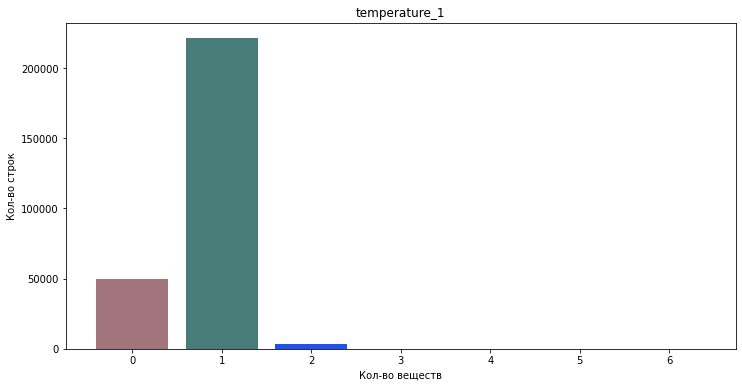

[264713, 9726, 0, 0, 0, 0, 0]


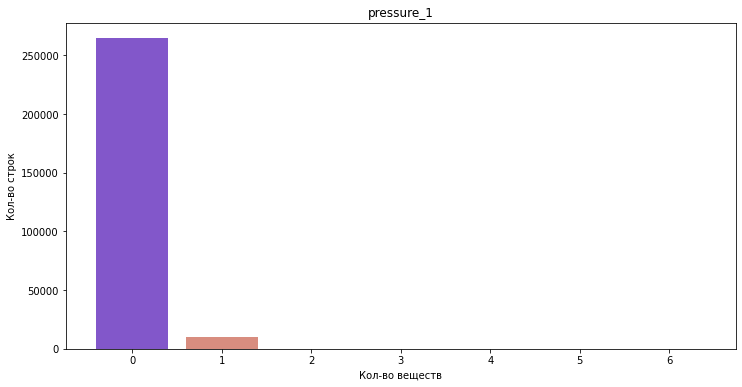

[86195, 188244, 0, 0, 0, 0, 0]


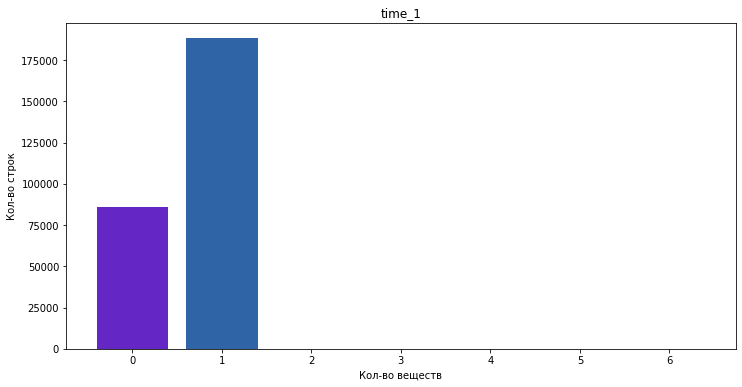

[273044, 1395, 0, 0, 0, 0, 0]


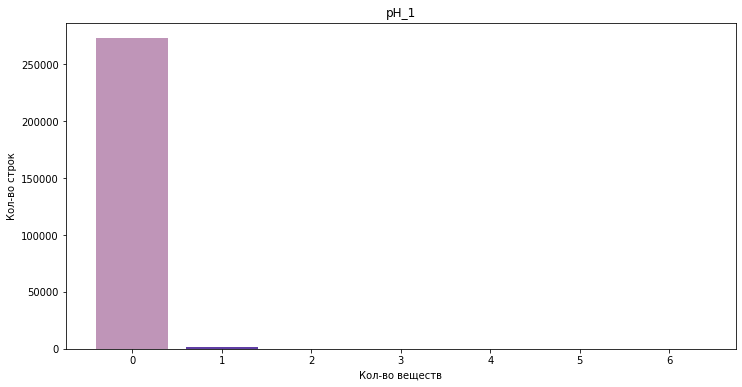

In [ ]:
#распределение количества значений

cols = ['temperature_1', 'pressure_1', 'time_1', 'pH_1']
for col in cols:
  print(more_than_one(col))
  number_of_compounds(col)

In [ ]:
df

,reaction_id,reactants,reactants_II,products,products_II,stages_number,yield_value,reference_title,authors,bibliography,...,catalysts_1_II,solvents_1,solvents_1_II,other_conditions_1,temperature_1,pressure_1,time_1,pH_1,folder,file
0,31-480-CAS-24139,119-53-9,NaN,134-81-6,NaN,1,90,Decomposition products of benzaldehyde,"Zinin, N.","Justus Liebigs Annalen der Chemie (1840), 186-192",...,NaN,None,NaN,NaN,[],[],[],[],NaN,NaN
1,31-480-CAS-18071,119-53-9,NaN,134-81-6,NaN,1,86,Benzil,"Clarke, H. T.","Organic Syntheses (1926), VI, 6-7",...,NaN,Water,NaN,NaN,[],[],[],[],NaN,NaN
2,31-480-CAS-27637,119-53-9,NaN,134-81-6,NaN,1,95,New reagent for the oxidation of acyloins to d...,"Rigby, W.","Journal of the Chemical Society (1951), 793-5",...,NaN,Acetic acid,Glycol monoethyl ether,NaN,[],[],[],[],NaN,NaN
3,31-480-CAS-25495,119-53-9,NaN,134-81-6,NaN,1,90,Reactions of thallium. II. Thallous ethoxide a...,"McHatton, L. P.","Journal of the Chemical Society (1953), 4095-7",...,NaN,Ethanol,NaN,NaN,[],[],[],[],NaN,NaN
4,31-480-CAS-37840,119-53-9,NaN,134-81-6,NaN,1,32,New reactions in organoselenium chemistry,"Brewster, Andrew George","1977, (20121004), No pp.",...,NaN,Tetrahydrofuran,NaN,NaN,[],[],[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279665,31-614-CAS-26952067,9011-14-7,100-42-5,106911-77-7,NaN,1,100,"Block copolymer intermediate, block copolymer,...","Kou, Youki","World Intellectual Property Organization, WO20...",...,NaN,Toluene,Cyclohexane,"3 h, 10 °C",[10.0],[],[3.0],[],11301-11400,11328.tsv
279666,31-614-CAS-26051353,9011-14-7,100-42-5,696598-57-9,NaN,1,85,Tailored Synthesis of Structurally Defined Pol...,"Yamago, Shigeru",Journal of the American Chemical Society (2002...,...,NaN,Chloroform,NaN,"24 h, 100 °C",[100.0],[],[24.0],[],11301-11400,11328.tsv
279667,31-614-CAS-26567521,9011-14-7,100-42-5,696598-57-9,NaN,1,85,Silsesquioxane-cored miktoarm copolymer amphip...,"Gao, Shuxi","European Polymer Journal (2021), 143, 110196",...,NaN,Toluene,NaN,"2 h, 70 °C",[70.0],[],[2.0],[],11301-11400,11328.tsv
279668,31-614-CAS-30155371,9011-14-7,100-42-5,821787-83-1,NaN,1,100,Precise Synthesis of New Triblock Co- and Terp...,"Matsuo, Yuri","Macromolecular Symposia (2013), 323(1), 26-36",...,NaN,None,NaN,"20 h, -40 °C",[-40.0],[],[20.0],[],11301-11400,11328.tsv


In [ ]:
divide('temperature_1')
divide('time_1')
divide('pressure_1')

In [ ]:
df2 = df[df['products_II'].isna()]
df2.shape

(260967, 24)

In [ ]:
df2.to_csv('dataset_processed_2conditions.csv', index=False)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260967 entries, 0 to 279669
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   reaction_id      260967 non-null  object
 1   reactants        260967 non-null  object
 2   reactants_II     198421 non-null  object
 3   products         260967 non-null  object
 4   stages_number    260967 non-null  int64 
 5   yield_value      260967 non-null  int64 
 6   reference_title  260967 non-null  object
 7   authors          260130 non-null  object
 8   bibliography     260219 non-null  object
 9   reagents_1       180733 non-null  object
 10  catalysts_1      115082 non-null  object
 11  solvents_1       227059 non-null  object
 12  temperature_1    214106 non-null  object
 13  pressure_1       260967 non-null  object
 14  time_1           178987 non-null  object
 15  folder           216193 non-null  object
 16  file             216193 non-null  object
dtypes: int64(2

In [ ]:
df3 = df2[['reaction_id', 'reactants', 'reactants_II','products', 'stages_number', 'yield_value', 'reference_title', 'authors', 'bibliography', 'reagents_1', 'catalysts_1', 'solvents_1', 'temperature_1', 'pressure_1', 'time_1', 'folder', 'file']]

In [ ]:
df3

,reaction_id,reactants,reactants_II,products,stages_number,yield_value,reference_title,authors,bibliography,reagents_1,catalysts_1,solvents_1,temperature_1,pressure_1,time_1,folder,file
0,31-480-CAS-24139,119-53-9,NaN,134-81-6,1,90,Decomposition products of benzaldehyde,"Zinin, N.","Justus Liebigs Annalen der Chemie (1840), 186-192",Nitric acid,None,None,None,None,None,NaN,NaN
1,31-480-CAS-18071,119-53-9,NaN,134-81-6,1,86,Benzil,"Clarke, H. T.","Organic Syntheses (1926), VI, 6-7",Pyridine,None,Water,None,None,None,NaN,NaN
2,31-480-CAS-27637,119-53-9,NaN,134-81-6,1,95,New reagent for the oxidation of acyloins to d...,"Rigby, W.","Journal of the Chemical Society (1951), 793-5",Bismuth oxide (Bi2O3),None,Acetic acid,None,None,None,NaN,NaN
3,31-480-CAS-25495,119-53-9,NaN,134-81-6,1,90,Reactions of thallium. II. Thallous ethoxide a...,"McHatton, L. P.","Journal of the Chemical Society (1953), 4095-7","Ethanol, thallium salt",None,Ethanol,None,None,None,NaN,NaN
4,31-480-CAS-37840,119-53-9,NaN,134-81-6,1,32,New reactions in organoselenium chemistry,"Brewster, Andrew George","1977, (20121004), No pp.",Phenylseleninyl benzeneseleninate,None,Tetrahydrofuran,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279665,31-614-CAS-26952067,9011-14-7,100-42-5,106911-77-7,1,100,"Block copolymer intermediate, block copolymer,...","Kou, Youki","World Intellectual Property Organization, WO20...",None,sec-Butyllithium,Toluene,10.0,None,3.0,11301-11400,11328.tsv
279666,31-614-CAS-26051353,9011-14-7,100-42-5,696598-57-9,1,85,Tailored Synthesis of Structurally Defined Pol...,"Yamago, Shigeru",Journal of the American Chemical Society (2002...,None,None,Chloroform,100.0,None,24.0,11301-11400,11328.tsv
279667,31-614-CAS-26567521,9011-14-7,100-42-5,696598-57-9,1,85,Silsesquioxane-cored miktoarm copolymer amphip...,"Gao, Shuxi","European Polymer Journal (2021), 143, 110196",None,Azobisisobutyronitrile,Toluene,70.0,None,2.0,11301-11400,11328.tsv
279668,31-614-CAS-30155371,9011-14-7,100-42-5,821787-83-1,1,100,Precise Synthesis of New Triblock Co- and Terp...,"Matsuo, Yuri","Macromolecular Symposia (2013), 323(1), 26-36",None,None,None,-40.0,None,20.0,11301-11400,11328.tsv


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260967 entries, 0 to 279669
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   reaction_id      260967 non-null  object
 1   reactants        260967 non-null  object
 2   reactants_II     198421 non-null  object
 3   products         260967 non-null  object
 4   stages_number    260967 non-null  int64 
 5   yield_value      260967 non-null  int64 
 6   reference_title  260967 non-null  object
 7   authors          260130 non-null  object
 8   bibliography     260219 non-null  object
 9   reagents_1       180733 non-null  object
 10  catalysts_1      115082 non-null  object
 11  solvents_1       227059 non-null  object
 12  temperature_1    214106 non-null  object
 13  pressure_1       8902 non-null    object
 14  time_1           178987 non-null  object
 15  folder           216193 non-null  object
 16  file             216193 non-null  object
dtypes: int64(2

In [ ]:
df3.to_csv('dataset_processed.csv', index=False)

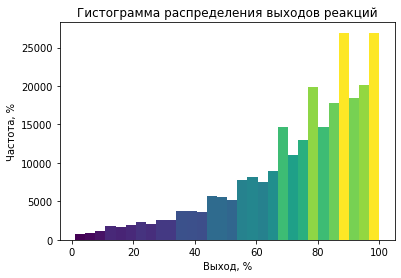

In [ ]:
#график распределения выходов реакций

yields = df3['yield_value']
fig3, axs3 = plt.subplots()
N, bins, patches = axs3.hist(yields, bins=30)

# Setting color
fracs = ((N**(1 / 2)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Выход, %")
plt.ylabel("Частота, %")
plt.title('Гистограмма распределения выходов реакций')

# Show plot
plt.show()

In [ ]:
#добавление smiles

def add_smiles(col_name, smiles_df, work_df):
  keys = smiles_df['query'].tolist()
  values = smiles_df['result'].tolist()
  d = dict(zip(keys, values))
  smiles_col_name = f'{col_name}_smiles'
  left = []
  for idx in work_df.index:
    key = work_df.loc[idx, col_name]
    if key in d.keys():
      work_df.loc[idx, smiles_col_name] = d[key]
    else:
      left.append(key)
  return set(left)

In [ ]:
solv1 = pd.read_csv('solvents_smiles_final.csv')
solv1

,query,result,comment,Unnamed: 3
0,Nitrogen,N#N,Multiple results,NaN
1,Carbon tetrabromide,BrC(Br)(Br)Br,Multiple results,NaN
2,Chlorocholine,ClCC[N+](C)(C)C,NaN,NaN
3,1850323-41-9,[Cl-].O=S(=O)(O)C1=CC=C(C=C1)C.OCC[N+](C)(C)C,NaN,NaN
4,Trimethylene carbonate,O=C1OCCCO1,Multiple results,NaN
...,...,...,...,...
902,Swasol 1000,CCCCCCCCCC1=CC=CC=C1,Not found,NaN
903,Galden HT 135,NaN,Not found,Не понимаю что это
904,Quinoline,N=1C=CC=C2C=CC=CC12,Multiple results,NaN
905,Methanol-d,OC,Multiple results,NaN


In [ ]:
k = {
    '1H-Imidazolium, 3-dodecyl-1-methyl-, (T-4)-tetrachloroferrate(1-) (1:1)':'[Cl-][Fe+3]([Cl-])([Cl-])[Cl-].C1=C[N+](=CN1C)CCCCCCCCCCCC',
    '(±)-2-Butanol':'OC(C)CC',
    'N,N,N′,N′-Tetramethylethylenediamine':'N(C)(C)CCN(C)C',
    '(1S,5R)-6,8-Dioxabicyclo3.2.1octan-4-one':'O=C1CCC2OC1OC2',
    '(5β,7α,12β)-7,12-Dihydroxycholan-24-oic acid':'O=C(O)CCC(C)C1CCC2C3C(O)CC4CCCCC4(C)C3CC(O)C12C',
    '(T-4)-N,N-Dibutyl-N-2-(hydroxy-κO)ethyl-1-butanaminiumatotrihydroboron':'[H-][B+3]([H-])([H-])[O-]CC[N+](CCCC)(CCCC)CCCC',
    '(±)-2-Hexanol':'OC(C)CCCC',
    '(±)-Propylene glycol':'OCC(O)C',
    '(±)-Propylene oxide':'O1CC1C',
    '1,1′-Biphenyl, mixt. with 1,1′-oxybisbenzene':'C=1C=CC(=CC1)C=2C=CC=CC2',
    '1-3,5-Diiodo-4-(4-methoxyphenoxy)phenylethanone':'O=C(C1=CC(I)=C(OC2=CC=C(OC)C=C2)C(I)=C1)C',
    '1-Butanaminium, 4-bis(2-hydroxyethyl)amino-N,N,N-tributyl-, bromide (1:1)':'[Br-].OCCN(CCO)CCCC[N+](CCCC)(CCCC)CCCC',
    '1-Propene, 1,1,2,3,3,3-hexafluoro-, trimer':'FC(F)=C(F)C(F)(F)F',
    '1H-Imidazolium, 1,3-dimethyl-, methanesulfonate (1:1)':'O=S(=O)([O-])C.C1=C[N+](=CN1C)C',
    '1H-Imidazolium, 1-ethyl-3-methyl-, chloride, μ-chlorotetrachlorodizincate(1-)':'[Cl-].[Cl-][Zn+2]([Cl-])[Cl-][Zn+2]([Cl-])[Cl-].C1=C[N+](=CN1C)CC',
    '1H-Imidazolium, 3,3′-(1,4-butanediyl)bis1-methyl-, bromide (1:2)':'[Br-].C1=C[N+](=CN1C)CCCC[N+]=2C=CN(C2)C',
    '1H-Imidazolium, 3-hexyl-1-methyl-, 2,2,2-trifluoroacetate (1:1)':'O=C([O-])C(F)(F)F.C1=C[N+](=CN1C)CCCCCC',
    '3,4-Dihydro-2H-pyran':'O1C=CCCC1',
    '4′-Methoxyacetophenone':'O=C(C1=CC=C(OC)C=C1)C',
    '5-(1,1-Dimethylethoxy)(4-nitrophenyl)methyl-2,4(1H,3H)-pyrimidinedione':'O=C1NC=C(C(=O)N1)C(OC(C)(C)C)C2=CC=C(C=C2)N(=O)=O',
    'Benzo2,3cholest-2-en-4′-ol':'OC1=CC=C2C(=C1)CC3CCC4C5CCC(C(C)CCCC(C)C)C5(C)CCC4C3(C)C2',
    'Ethanaminium, 2-hydroxy-N,N,N-trimethyl-, μ-chlorotetrachlorodizincate(1-) (1:1)':'[Cl-][Zn+2]([Cl-])[Cl-][Zn+2]([Cl-])[Cl-].OCC[N+](C)(C)C',
    'Formic acid, compd. with 2-(2-aminoethyl)aminoethanol (1:1)':'O=CO.OCCNCCN',
    'Guanidine, 2,2,2-trifluoroacetate (1:1)':'O=C(O)C(F)(F)F.N=C(N)N',
    'Guanidine, N,N,N′,N′-tetramethyl-, 2,2,2-trifluoroacetate (1:1)':'O=C(O)C(F)(F)F.N=C(N(C)C)N(C)C',
    'N,N′-Dimethylurea':'O=C(NC)NC',
    'N-7-(4-Amino-2,3-dihydroxybutyl)-6,7-dihydro-6-oxo-1H-purin-2-ylacetamide':'O=C1N=C(NC(=O)C)NC=2N=CN(C12)CC(O)C(O)CN',
    'Thiophene, 2,5-dihydro-2-methyl-, 1,1-dioxide':'O=S1(=O)CC=CC1C',
    'α,α-Bis(trifluoromethyl)benzenemethanol':'FC(F)(F)C(O)(C=1C=CC=CC1)C(F)(F)F',
    'β-Cyclodextrin':'OCC1OC2OC3C(O)C(O)C(OC3CO)OC4C(O)C(O)C(OC4CO)OC5C(O)C(O)C(OC5CO)OC6C(O)C(O)C(OC6CO)OC7C(O)C(O)C(OC7CO)OC8C(O)C(O)C(OC8CO)OC1C(O)C2O',
    'β-D-Glucopyranoside, methyl, 2,3-bis(4-methylbenzenesulfonate)':'O=S(=O)(OC1C(OC)OC(CO)C(O)C1OS(=O)(=O)C2=CC=C(C=C2)C)C3=CC=C(C=C3)C',
    'γ-Butyrolactone':'O=C1OCCC1',
    'γ-Valerolactone':'O=C1OC(C)CC1',
    'Toluene (α-bromo or α-chloro derivative)':'C=1C=CC(=CC1)C',
    'Pyridinium, 1,1′-(1,6-hexanediyl)bis3-methyl-, bromide (1:2)':'[Br-].C=1C=C(C=[N+](C1)CCCCCC[N+]=2C=CC=C(C2)C)C',
    None:None
}

solv2 = pd.DataFrame(list(k.items()), columns=['query', 'result'])
frames = [solv1, solv2]
solv_df = pd.concat(frames, ignore_index=True)
solv_df.to_csv('solvents_smiles_final_1.csv', index=False)

In [ ]:
df3.loc[190425, 'solvents_1']='Methylcyclohexane'
add_smiles('solvents_1', solv_df, df3)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


set()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260967 entries, 0 to 279669
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   reaction_id        260967 non-null  object
 1   reactants          260967 non-null  object
 2   reactants_II       198421 non-null  object
 3   products           260967 non-null  object
 4   stages_number      260967 non-null  int64 
 5   yield_value        260967 non-null  int64 
 6   reference_title    260967 non-null  object
 7   authors            260130 non-null  object
 8   bibliography       260219 non-null  object
 9   reagents_1         180733 non-null  object
 10  catalysts_1        115082 non-null  object
 11  solvents_1         227059 non-null  object
 12  temperature_1      214106 non-null  object
 13  pressure_1         8902 non-null    object
 14  time_1             178987 non-null  object
 15  folder             216193 non-null  object
 16  file               2

In [ ]:
prod_df = pd.read_csv('products_smiles_final.csv')
prod_df

,query,result,comment
0,2784600-84-4,[Br-].O=C(OC1CC(C=C)(C)C(O)C(C)C23CCC(=O)C2C1(...,NaN
1,118622-71-2,S1C(SCC1)=C(CC=2C=CC=CC2)C(C=C(C)C)C=3C=CC=CC3,NaN
2,1621706-82-8,O=C(OC(C)(C)C)C1(N=C(SC1)C=2C=CC=CC2)CC=3C=CC=CC3,NaN
3,51755-92-1,O=S(=O)(C=1C=CC=CC1)CC(O)C=2C=CC=CC2,NaN
4,1352276-39-1,O=C(OC)C1(COCC=2C=CC=CC2)CCOCC1,NaN
...,...,...,...
6771,1044792-35-9,O=C(OC(C)(C)C)N(N(CC=1C=CC=CC1)CC)C,Error
6772,1473418-17-5,O=C(OC)C=1C(=CN(C1C)CC=2C=CC=CC2)C=3C=CC=CC3Cl,Error
6773,2408618-04-0,[C@@H](OCC1=CC=CC=C1)(COCC2=CC=CC=C2)[C@@]3([C...,Error
6774,854535-03-8,N(CC1=CC(C)=CC=C1)(CC2=CC=CC=C2)[C@H]3[C@H](N(...,Error


In [ ]:
add_smiles('products', prod_df, df3)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


{'120627-66-9',
 '2624359-04-0',
 '411211-18-2',
 '2365332-79-0',
 '1799517-93-3',
 '1878151-25-7',
 '2134106-00-4',
 '141493-26-7',
 '1002121-22-3',
 '1779535-33-9',
 '26760-22-5',
 '1851314-59-4',
 '123876-56-2',
 '2476541-31-6',
 '99663-32-8',
 '1454256-90-6',
 '1001915-39-4',
 '2050744-98-2',
 '1145961-35-8',
 '2089708-23-4',
 '1951461-51-0',
 '1001386-66-8',
 '183966-53-2',
 '1198467-73-0',
 '1448819-57-5',
 '1170669-27-8',
 '1001440-57-8',
 '2716888-33-2',
 '1191403-13-0',
 '30490-54-1',
 '302914-54-1',
 '1000796-74-6',
 '1821523-50-5',
 '2640792-45-4',
 '1000892-94-3',
 '344329-27-7',
 '1268353-70-3',
 '1132793-04-4',
 '30611-16-6',
 '31164-98-4',
 '1221755-80-1',
 '1173691-23-0',
 '1004308-46-6',
 '1431153-29-5',
 '850464-72-1',
 '1305287-60-8',
 '1686128-02-8',
 '1421844-89-4',
 '2820270-25-3',
 '1015-28-7',
 '1696398-77-2',
 '1630041-17-6',
 '117053-69-7',
 '1613520-89-0',
 '1574-85-2',
 '1003869-36-0',
 '1447957-82-5',
 '2649358-07-4',
 '1135618-93-7',
 '2135833-57-5',
 '599